# Analyzing the Relation Between Tip and Bill with Correlation Analysis

**Problem**:
* It there correlation between tip and bill?

## Hypothesis 

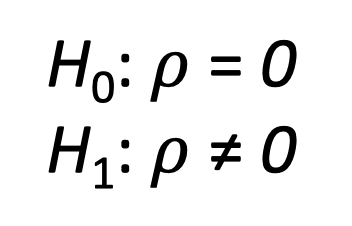

In [27]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
df["bill"] = df["total_bill"] - df["tip"]

In [29]:
df

,total_bill,tip,sex,smoker,day,time,size,bill
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07


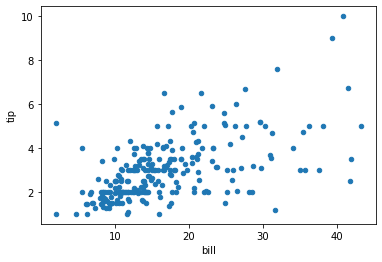

In [30]:
df.plot.scatter("bill", "tip");

## Assumption Control

In [31]:
from scipy import stats

In [32]:
stats.shapiro(df.tip)

ShapiroResult(statistic=0.897811233997345, pvalue=8.20057563521992e-12)

In [33]:
stats.shapiro(df.bill)

ShapiroResult(statistic=0.9135652184486389, pvalue=1.1060377613780759e-10)

#### Shapiro Wilks Test H0: There is not significant difference between sampling distribution and theoritical normal distribution 

#### Obtained p-values lower than alpha (0.05) so we can reject hypothesis H0.

## Hypothesis Test

### Correlation Coefficient

#### Pearson Correlation Coefficient

In [39]:
df["tip"].corr(df["bill"])

0.5766634471096382

#### Spearman Correlation Coefficient

In [40]:
df["tip"].corr(df["bill"], method = "spearman")

0.593691939408997

### Testing the Significance of Correlation

In [44]:
stats.stats.pearsonr(df["tip"], df["bill"])

(0.5766634471096377, 5.01829008494899e-23)

##### H0: There is no significant relation between variables

##### Obtained p-value is lower than alpha (0.05) so we can reject hypothesis H0

## Nonparametric Hypothesis Test

#### Spearman

In [46]:
stats.stats.spearmanr(df["tip"], df["bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

##### H0: There is no significant relation between variables

##### Obtained p-value is lower than alpha (0.05) so we can reject hypothesis H0

#### Kendall Tau

In [48]:
stats.kendalltau(df["tip"], df["bill"])

KendalltauResult(correlation=0.4400790074919885, pvalue=7.131027725873721e-24)

##### H0: There is no significant relation between variables

##### Obtained p-value is lower than alpha (0.05) so we can reject hypothesis H0